# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 7.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

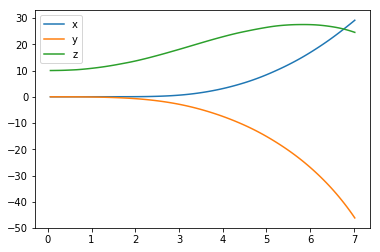

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

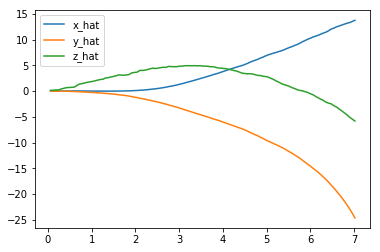

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

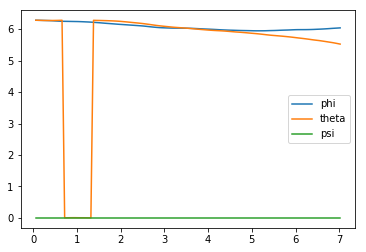

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

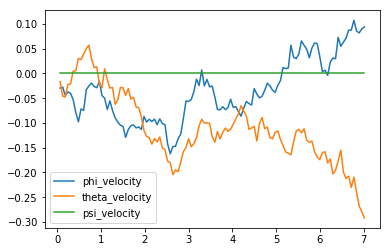

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

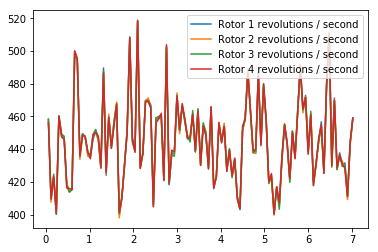

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 29.15552644 -46.12486054  24.5400037    6.04020628   5.5246742    0.        ]
[ 13.77260394 -24.62402262  -5.79810189]
[ 0.09411121 -0.29177069  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [15]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   7.478 (best =   8.268), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [6]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from agents.agent import Agent
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

episodes = 400
task = Task(target_pos=np.array([0., 0., 100.]))
agent = Agent(task)
best_score = 0
worst_score = 1000

labels = ['episode', 'score']
results = {x : [] for x in labels}

for episode in range(1, episodes + 1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score , score)
        worst_score = min(worst_score , score)
        if done:
            print("Episode = {:4d}, score = {:7.3f}".format(
            episode, score))
            print("positon: ", task.sim.pose[:3], "\n")
            break
    results['episode'].append(episode)
    results['score'].append(score)
    sys.stdout.flush()
print("Best Score: {}".format(best_score))
print("Worst Score: {}".format(worst_score))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1, score = 560.203
positon:  [ 27.00431219 -13.09813422  17.80344512] 

Episode =    2, score = 286.018
positon:  [ 19.20269739   3.47333286   0.        ] 

Episode =    3, score = 558.660
positon:  [ 68.74337638  -1.64562065  42.36301615] 

Episode =    4, score = 212.318
positon:  [-7.35224747 -0.37030563  0.        ] 

Episode =    5, score = 186.751
positon:  [-3.34177273  0.18228986  0.        ] 

Episode =    6, score = 183.037
positon:  [-5.14635845  0.88603654  0.        ] 

Episode =    7, score = 268.631
positon:  [-19.41611712  17.23453531   0.        ] 

Episode =    8, score = 259.307
positon:  [ 31.60600185  16.75551227   0.        ] 

Episode =    9, score = 224.952
positon:  [ -4.58696268  12.3546503    0.        ] 

Episode =   10, score = 221.891
positon:  [-13.67344565   8.75512878   0.        ] 

Episode =   11, score = 224.516
positon:  [-10.09209022  18.71400559   

Episode =   95, score = 541.959
positon:  [ -18.71622631  150.          300.        ] 

Episode =   96, score = 481.718
positon:  [ -63.1776311  150.         300.       ] 

Episode =   97, score = 462.753
positon:  [  -0.7490304   134.41714554  300.        ] 

Episode =   98, score = 573.138
positon:  [ -54.33209278  -34.68649806  116.13499929] 

Episode =   99, score = 572.690
positon:  [  28.84516733  -75.51377416  131.38304355] 

Episode =  100, score = 576.801
positon:  [  -2.63864807   29.91827259  165.57328376] 

Episode =  101, score = 578.327
positon:  [ -15.9992207    -8.86180637  136.80819932] 

Episode =  102, score = 579.767
positon:  [  -7.84820497   -3.88684207  138.30713537] 

Episode =  103, score = 573.212
positon:  [  27.50781125   55.39245174  213.39076017] 

Episode =  104, score = 577.781
positon:  [  -4.50095953   20.88338852  153.86733256] 

Episode =  105, score = 577.614
positon:  [   8.57180029   -0.47384206  158.56792557] 

Episode =  106, score = 574.566
pos

Episode =  189, score = 575.367
positon:  [   6.9121938    77.62503103  300.        ] 

Episode =  190, score = 574.621
positon:  [ -17.09042453   18.68646013  227.85287069] 

Episode =  191, score = 575.761
positon:  [ -19.39765267  -41.6448627   128.09077691] 

Episode =  192, score = 575.947
positon:  [  20.09726334  -43.52187948  125.2226487 ] 

Episode =  193, score = 575.672
positon:  [ -55.79657991    5.45663955  124.36073871] 

Episode =  194, score = 573.840
positon:  [  59.00955936   12.41250005  151.11242203] 

Episode =  195, score = 575.110
positon:  [  24.85292607  -30.42513168  134.32345671] 

Episode =  196, score = 575.554
positon:  [ -63.85419226   -5.31367082  111.55916604] 

Episode =  197, score = 575.744
positon:  [   8.30487342  -45.13347975  127.92578692] 

Episode =  198, score = 576.857
positon:  [  -9.67205015   16.67103286  161.90489275] 

Episode =  199, score = 481.747
positon:  [ -34.45731404  145.19571139  300.        ] 

Episode =  200, score = 576.657


Episode =  283, score = 567.729
positon:  [-55.66959099  66.70837545  99.03896535] 

Episode =  284, score = 500.480
positon:  [ 150.         -150.          226.42558829] 

Episode =  285, score = 393.982
positon:  [   2.96225033  150.          298.42647755] 

Episode =  286, score = 366.942
positon:  [ -29.59676931  150.          160.40027702] 

Episode =  287, score = 373.854
positon:  [  17.3051474   150.          155.49661442] 

Episode =  288, score = 385.115
positon:  [ -14.63026023  150.          238.75925369] 

Episode =  289, score = 428.610
positon:  [   9.4429722   126.08083851  300.        ] 

Episode =  290, score = 450.008
positon:  [ -31.45722353  150.          300.        ] 

Episode =  291, score = 568.557
positon:  [  51.75812294   81.34380184  199.44956495] 

Episode =  292, score = 577.321
positon:  [  29.23397268   -4.34679445  144.02455121] 

Episode =  293, score = 537.330
positon:  [ -33.39722131  150.          250.29255816] 

Episode =  294, score = 572.350
pos

Episode =  377, score = 575.429
positon:  [ 33.14363626 -72.76701929  96.20397288] 

Episode =  378, score = 576.429
positon:  [ -50.40420836    2.20132655  124.47259818] 

Episode =  379, score = 573.680
positon:  [ -71.29788845   11.57128623  110.52666871] 

Episode =  380, score = 569.367
positon:  [ -73.95148926  148.58479625  300.        ] 

Episode =  381, score = 576.413
positon:  [  26.49675017   19.98434345  134.32008127] 

Episode =  382, score = 576.496
positon:  [  26.5402989   -38.42998742  125.60307186] 

Episode =  383, score = 578.334
positon:  [  1.39852341e+01  -1.29813156e-01   1.45405493e+02] 

Episode =  384, score = 559.904
positon:  [  26.7399271   -94.89329429  300.        ] 

Episode =  385, score = 532.784
positon:  [  30.81774354  150.          300.        ] 

Episode =  386, score = 549.465
positon:  [ -17.86311689  120.35243425  300.        ] 

Episode =  387, score = 576.537
positon:  [ -54.41884166   -5.55686573  120.70171386] 

Episode =  388, score = 57

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

(92.85013015821886, 602.95308559582986)

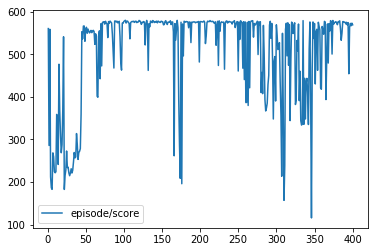

In [7]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['score'], label='episode/score')
plt.legend()
plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

This was a very challenging project for me. I selected the takeoff task because it was the easiest choice. I used a non linear tanh function on the difference between the pose and target pose based on a recommendation of other students on Slack.
- reward = np.tanh(1 - 0.003*(abs(self.sim.pose[:3] - self.target_pos))).sum()

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- I used the DDPG for the task based on an article provided on my last submission. I still have inconsistent results, however. Sometimes, the agent seems to learn pretty well, as it did in this submission. Other times, it starts off fine, but will start crashing in the z-dimension after 100 episodes or so. I have no idea what is causing this, but I wonder if it is the hyperparameters I've chosen for the neural networks of the actor and critic.

- The hyperparameters I ended up using are experience replay memory = 64, tau = 0.001, critic learning rate = 0.001, actor learning rate = 0.0001, gamma = 0.99, and experience replay capacity = 100000

- I used neural networks for both the actor and critic:
    - Actor
        Dense(units=400) + BatchNorm + L2 Regularisation + ReLu Activation
        Dense(units=300) + BatchNorm + L2 Regularisation + ReLu Activation
        Dense( RandomUniform Weight initialisation ) + Sigmoid Activation
     - Critic State Pathway
        Dense(units=400) + BatchNorm + L2 Regularisation + ReLu Activation
        Dense(units=300) + BatchNorm + L2 Regularisation + ReLu Activation
        Dense( RandomUniform Weight initialisation ) + Sigmoid Activation
     - Critic Action Pathway
        Dense(units=300) + L2 Regularisation + ReLu Activation
     - Combining State and Action
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)


**Answer**:

- This was, by far, the hardest project in the course. I feel that my understanding of what I'm doing is marginal at best. My results were often inconsitent between runs, even if I didn't change anything.

- I would say the learning curve was very gradual. I'm not entirely sure it was a curve at all on some points. 

- For this running particular training run, the rewards over the last 10 episodes were pretty good. In other training runs, that's not the case. Sometimes it gets worse and starts crashing in the z-dimension.


In [11]:
# Performance: Last 10 Episodes

print("Mean score over last 10 episodes: {}".format(np.sum(results['score'][-10:])/10))

Mean score over last 10 episodes: 558.8185762621985


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.


The concepts were difficult to grasp for me to grasp, in general. I guess the main thing I learned was the impact that choosing a reward function can have on performance.